In [2]:
import numpy as np
from keras.models import model_from_json
import cv2

C:\Users\Bhumit\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Load models from file
load_model = open('not-mnist-model.json', 'r')
json_model = load_model.read()
load_model.close()
model = model_from_json(json_model)
model.load_weights('not-mnist-weights.h5')

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
__________

In [5]:
import cv2
def image_invert(image):
    img = cv2.imread(image, 0)
    img = np.array(img)
    copy = np.copy(img)
    copy[copy>50] = 0
    copy[copy>0] = 255
    return copy

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

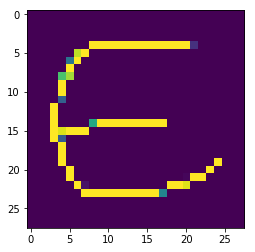

In [7]:
img = image_invert(image='e_down.jpg')
img = cv2.resize(img, (28,28))
plt.imshow(img)

In [8]:
print(model.predict_classes(img.reshape(1,28,28,1)))

[4]
